<a href="https://colab.research.google.com/github/Malek-Ghorbel/ranking-semantics-Abstract-Argumentation/blob/main/4_Alpha_Burden_based_semantic(alpha_Bbs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Import librairies:

In [49]:
import matplotlib.pyplot as plt
import networkx as nx
import math

# 2-Create the graph

In [50]:
def create_graph(nodes, edges):
  G = nx.DiGraph()
  G.add_nodes_from(nodes)
  G.add_edges_from(edges)
  return G

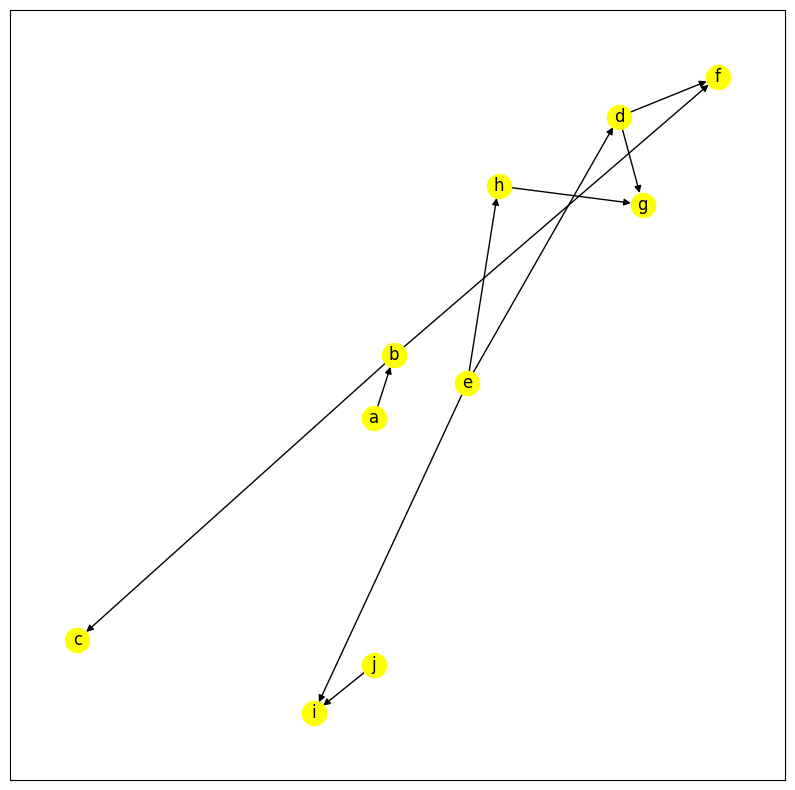

In [51]:
nodes = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
edges = [('a', 'b'), ('b' , 'c'), ('b', 'f'), ('d', 'f'), ('d', 'g'), ('e', 'h'), ('e', 'd'), ('e', 'i'),  ('j', 'i'), ('h', 'g')]
G = create_graph(nodes, edges)
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, with_labels = True, node_color ='yellow')

# **3-Implement the function:**

In [61]:
def s_alpha(x, alpha, R1, tab):
    if tab[x] != 0 :
        return tab[x]
    if (not R1[x]):
        return 1
    s = sum(1/s_alpha(y, alpha, R1, tab) ** alpha for y in R1[x])
    result = 1 + (s ** (1/alpha))
    tab[x] = result
    return result

In [62]:
def alpha_burden_based(G, alpha) :
  #Initialization:
    node_to_index = {node: index for index, node in enumerate(G.nodes())}
    predecessors = {node_to_index[node]: [node_to_index[pred] for pred in G.predecessors(node)] for node in G.nodes()}
    num_nodes = G.number_of_nodes()
    nodes = list(G.nodes())
    
    s_alpha_tab = [0] * num_nodes

    #Create the steps tab
    for j in range(num_nodes):
      s_alpha_tab[j] = s_alpha(j, alpha, predecessors, s_alpha_tab)
                  

    print(s_alpha_tab)

    #Rank
    nodes_sa = list(zip(nodes ,  s_alpha_tab))
    sorted_nodes = [x[0] for x in sorted(nodes_sa, key=lambda x: x[1:])]
    return sorted_nodes

# **4-Call the function:**

In [63]:
alpha_burden_based(G, 5)

[1, 2.0, 1.5, 2.0, 1, 1.5743491774985174, 1.5743491774985174, 2.0, 2.148698354997035, 1]


['a', 'e', 'j', 'c', 'f', 'g', 'b', 'd', 'h', 'i']

In [64]:
alpha_burden_based(G, 1)

[1, 2.0, 1.5, 2.0, 1, 2.0, 2.0, 2.0, 3.0, 1]


['a', 'e', 'j', 'c', 'b', 'd', 'f', 'g', 'h', 'i']

In [65]:
alpha_burden_based(G, 0.5)

[1, 2.0, 1.5, 2.0, 1, 2.9999999999999996, 2.9999999999999996, 2.0, 5.0, 1]


['a', 'e', 'j', 'c', 'b', 'd', 'h', 'f', 'g', 'i']

In [66]:
alpha_burden_based(G, 0.10)

[1, 2.0, 1.5, 2.0, 1, 513.0, 513.0, 2.0, 1025.0, 1]


['a', 'e', 'j', 'c', 'b', 'd', 'h', 'f', 'g', 'i']